In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## load data set and perform exploratory data analysis

In [19]:
# read the csv file
import pandas as pd
df = pd.read_csv ("https://raw.githubusercontent.com/menonpg/CMU_PGSS_2021/main/Week01/L2-762021/britishSeatBeltStudy.csv", header = 0)
# df = df.iloc[1:, :]
# df.columns = ["DriversKilled","drivers","front","rear","kms","PetrolPrice","VanKilled","law","Date"]
df

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law,Date
0,107,1687,867,269,9059,0.102972,12,0,1969-01-01
1,97,1508,825,265,7685,0.102363,6,0,1969-02-01
2,102,1507,806,319,9963,0.102062,12,0,1969-03-01
3,87,1385,814,407,10955,0.100873,8,0,1969-04-01
4,119,1632,991,454,11823,0.101020,10,0,1969-05-01
...,...,...,...,...,...,...,...,...,...
187,96,1284,644,521,21626,0.114797,5,1,1984-08-01
188,122,1444,643,429,20195,0.114093,7,1,1984-09-01
189,120,1575,641,408,19928,0.116466,7,1,1984-10-01
190,137,1737,711,490,18564,0.116026,4,1,1984-11-01


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DriversKilled  192 non-null    int64  
 1   drivers        192 non-null    int64  
 2   front          192 non-null    int64  
 3   rear           192 non-null    int64  
 4   kms            192 non-null    int64  
 5   PetrolPrice    192 non-null    float64
 6   VanKilled      192 non-null    int64  
 7   law            192 non-null    int64  
 8   Date           192 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 13.6+ KB


In [21]:
df['law'].value_counts()

0    169
1     23
Name: law, dtype: int64

In [29]:
df.groupby('law').agg({'DriversKilled': ['min', 'max', 'mean', 'std']})

DriversKilled                            
              min  max        mean        std
law                                          
0              79  198  125.869822  24.260876
1              60  154  100.260870  22.228600

In [37]:
df['PercentageDriversKilled'] = (df['DriversKilled']/df['drivers']) * 100
# df.drop('FractionofDriversKilled', inplace=True, axis=1)
df

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law,Date,PercentageDriversKilled
0,107,1687,867,269,9059,0.102972,12,0,1969-01-01,6.342620
1,97,1508,825,265,7685,0.102363,6,0,1969-02-01,6.432361
2,102,1507,806,319,9963,0.102062,12,0,1969-03-01,6.768414
3,87,1385,814,407,10955,0.100873,8,0,1969-04-01,6.281588
4,119,1632,991,454,11823,0.101020,10,0,1969-05-01,7.291667
...,...,...,...,...,...,...,...,...,...,...
187,96,1284,644,521,21626,0.114797,5,1,1984-08-01,7.476636
188,122,1444,643,429,20195,0.114093,7,1,1984-09-01,8.448753
189,120,1575,641,408,19928,0.116466,7,1,1984-10-01,7.619048
190,137,1737,711,490,18564,0.116026,4,1,1984-11-01,7.887162


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


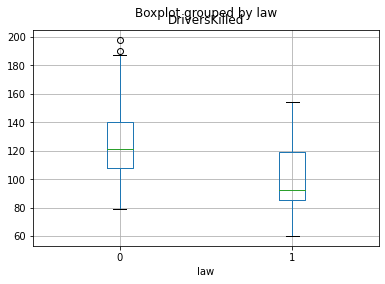

In [27]:
df.boxplot('DriversKilled', 'law')

In [25]:
# 1 When did the seatbelt law come into effect

# 2 was there a difference in the average death comparing before and after the law was created

# compare various variables to see if there is a relation

In [45]:
# 1
i = 0
while i < 192:
  if 'law' == 0:
    i = i + 1
  else:
    print(df.at[df.index[i],'Date'])
    break

1969-01-01


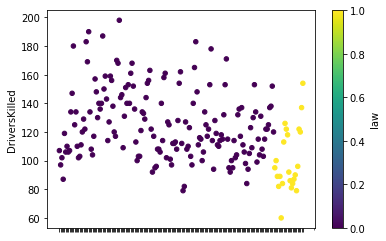

In [46]:
df.plot.scatter(x = 'Date', y = 'DriversKilled', c = 'law', colormap = 'viridis')

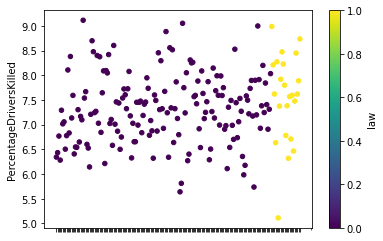

In [49]:
df.plot.scatter(x = 'Date', y = 'PercentageDriversKilled', c = 'law', colormap = 'viridis')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


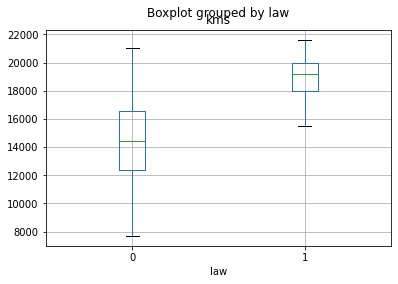

In [50]:
df.boxplot('kms', 'law')

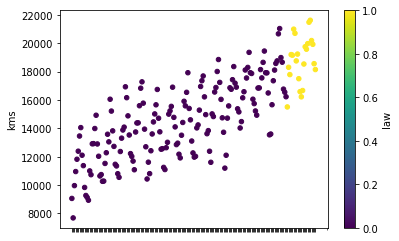

In [51]:
df.plot.scatter(x = 'Date', y = 'kms', c = 'law', colormap = 'viridis')

In [52]:
##Using sk learn to do regression and analysis

## build a classification model that is robust ato covariates and other confounding variables in our data to predict the state of law being in effect

In [56]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

X=df[['PercentageDriversKilled', 'kms']]  # Features
y=df['law'].astype('category')  # Labels

myModel = LogisticRegression()
myModel.fit(X,y)

y_pred = myModel.predict([[0.1, 100]])[0]
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0

In [57]:
y_pred = myModel.predict([[0.01, 100]])[0]
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0

In [58]:
from sklearn.metrics import classification_report
y_pred_proba = myModel.predict_proba(X)[:,1]
y_pred = myModel.predict(X)

# cr = classification_report(y, y_pred>0.15)
cr = classification_report(y, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       169
           1       0.67      0.26      0.38        23

    accuracy                           0.90       192
   macro avg       0.79      0.62      0.66       192
weighted avg       0.88      0.90      0.88       192



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


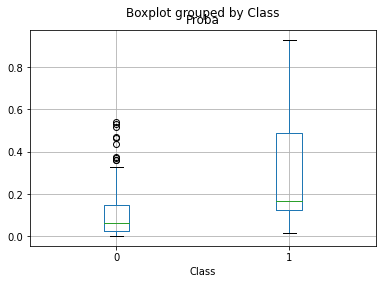

In [59]:
temp = pd.DataFrame({'Class': y, 'Proba': y_pred_proba})

temp.boxplot('Proba', 'Class')

In [60]:
cr = classification_report(y, 1-(y_pred_proba>(0.12)))
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.31      0.44       169
           1       0.05      0.26      0.08        23

    accuracy                           0.31       192
   macro avg       0.40      0.29      0.26       192
weighted avg       0.67      0.31      0.40       192



In [69]:
# shows confusion matrix: top left: true positive; top right: false neg; bottom left: false pos; bottom right: true neg
pd.crosstab(temp['Class'], 1-(temp['Proba']>0.12))

Proba,0,1
Class,,
0,53,116
1,17,6


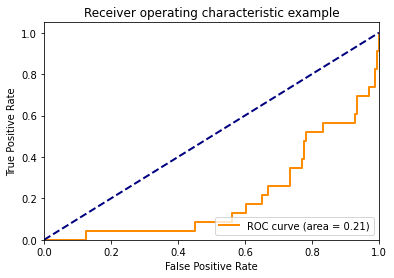

In [72]:
import numpy as np
import matplotlib.pyplot as plt

norma = np.array(y_pred_proba)
norma /= norma.max()

from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y, 1-norma)
roc_auc = auc(fpr, tpr)

plt.show()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## perform linear regression using sklearn in order to model drivers killed

In [73]:
df.columns

Index(['DriversKilled', 'drivers', 'front', 'rear', 'kms', 'PetrolPrice',
       'VanKilled', 'law', 'Date', 'PercentageDriversKilled'],
      dtype='object')

In [81]:
from sklearn.linear_model import LinearRegression

X=df[['drivers', 'kms', 'PetrolPrice', 'law']]  # Features
y=df['DriversKilled']   # Labels

myModelRegression = LinearRegression()
myModelRegression.fit(X,y)

y_pred = myModelRegression.predict([[100, 100, 0.1037, 1]])[0]
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


-12.49149303215852

In [82]:
y_pred = myModelRegression.predict([[1000, 1000, 0.1037, 1]])[0]
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


62.59083690703113

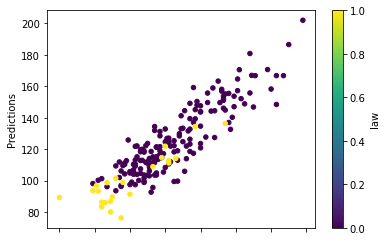

In [83]:
myresults = pd.DataFrame({'Predictions':myModelRegression.predict(X), 'DriversKilled':y, 'law': df['law']})
myresults.plot.scatter(x = 'DriversKilled', y = 'Predictions', c = 'law', colormap = 'viridis')